In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images-for-heatmap/fake_2.jpg
/kaggle/input/images-for-heatmap/real_3.jpg
/kaggle/input/images-for-heatmap/fake_0.jpg
/kaggle/input/images-for-heatmap/fake_1.jpg
/kaggle/input/images-for-heatmap/real_1.jpg
/kaggle/input/deepfake-detection-model/deepfake-detector-model.keras


In [3]:
import tensorflow as tf

model = tf.keras.models.load_model('/kaggle/input/deepfake-detection-model/deepfake-detector-model.keras')


In [4]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,544,165 (51.67 MB)

 Trainable params: 4,514,721 (17.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,029,444 (34.44 MB)

None


In [5]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

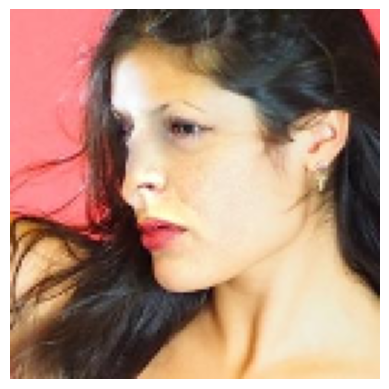

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

model_builder = keras.applications.xception.Xception
img_size = (128, 128)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_5"

# Define the image path from the Kaggle input folder
img_path = '/kaggle/input/images-for-heatmap/fake_2.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to fit model input size
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (for CNN input)
img_array /= 255.0  # Normalize pixel values

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Now, img_array is ready to be passed to your model for prediction or analysis


In [7]:
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

In [8]:
print(f"Shape of img_array: {img_array.shape}")

Shape of img_array: (1, 128, 128, 3)


In [9]:
for layer in model.layers:
    print(layer.name)

conv2d
conv2d_1
max_pooling2d
conv2d_2
conv2d_3
max_pooling2d_1
conv2d_4
conv2d_5
max_pooling2d_2
flatten
dropout
dense
dense_1
dense_2


In [10]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))
preds = model.predict(img_array)
print(f"Predictions: {preds}")  # Check if predictions are generated successfully

I0000 00:00:1729593492.324883      99 service.cc:145] XLA service 0x791228006c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729593492.324925      99 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729593492.324928      99 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions: [[0.9999366]]


I0000 00:00:1729593494.035638      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [71]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    # Load the image and resize to 128x128
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)  # Convert to array of shape (128, 128, 3)
    
    # Check original shape
    print(f"Original image shape: {img_array.shape}")  # Should be (128, 128, 3)

    # Optionally expand the channels if your model expects more channels
    # Example: if model can take 128 channels, you might want to repeat or create dummy channels
    # img_array = np.concatenate([img_array] * (128 // 3), axis=-1)  # This will create (128, 128, 128) by repeating channels
    # or, you can fill the remaining channels with zeros as required:
    
    img_array = np.concatenate([img_array, np.zeros((128, 128, 128 - 3))], axis=-1)  # Make sure to keep dimensions consistent
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    print(f"Processed image shape: {img_array.shape}")  # Should be (1, 128, 128, 128)
    
    return img_array

# Usage
img_array = preprocess_image("/kaggle/input/images-for-heatmap/fake_2.jpg")

# Test the last conv layer
last_conv_layer = model.get_layer("conv2d_5")
test_output = last_conv_layer(img_array)
print("Last conv layer output shape:", test_output.shape)  # Should match (None, 32, 32, 128)


Original image shape: (128, 128, 3)
Processed image shape: (1, 128, 128, 128)
Last conv layer output shape: (1, 128, 128, 128)


In [12]:
last_conv_layer = model.get_layer("conv2d_5")
test_output = last_conv_layer(img_array)
print("Last conv layer output shape:", test_output.shape)


Last conv layer output shape: (1, 128, 128, 128)


In [15]:
preds = model.predict(img_array)
print("Predictions:", preds)
print("Predictions shape:", preds.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions: [[0.6236867]]
Predictions shape: (1, 1)


In [77]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Function to preprocess the input image
def preprocess_image(img_path):
    img = keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

In [78]:
img_array = preprocess_image("/kaggle/input/images-for-heatmap/fake_2.jpg")

In [79]:
# Get predictions
predictions = model.predict(img_array)
print("Model predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model predictions: [[0.6236867]]


In [80]:
# List all layers in the model
for layer in model.layers:
    print(layer.name)

conv2d
conv2d_1
max_pooling2d
conv2d_2
conv2d_3
max_pooling2d_1
conv2d_4
conv2d_5
max_pooling2d_2
flatten
dropout
dense
dense_1
dense_2


In [81]:
print(model.inputs)

[<KerasTensor shape=(None, 128, 128, 3), dtype=float32, sparse=False, name=input_layer>]


In [82]:
# Assuming img_array is prepared using your preprocess_image function
predictions = model.predict(img_array)
print("Predicted probabilities:", predictions)

# Determine the class index based on the prediction
class_index = 1 if predictions[0][0] > 0.5 else 0
print("Class index for Grad-CAM:", class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted probabilities: [[0.6236867]]
Class index for Grad-CAM: 1


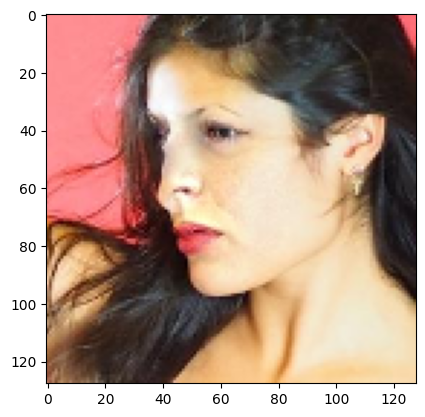

In [102]:
plt.imshow(img)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━

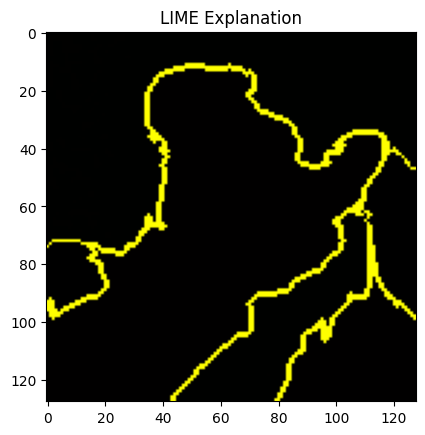

In [101]:
import numpy as np
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Assuming your model is already loaded and img_array is preprocessed
img_path = "/kaggle/input/images-for-heatmap/fake_2.jpg"
img_array = preprocess_image(img_path)  # Your preprocess function

# Define the LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Explain the model's prediction on the image
explanation = explainer.explain_instance(
    img_array[0],           # Single image (remove batch dimension)
    model.predict,           # Your CNN model's predict function
    top_labels=5,            # Number of top labels to explain
    hide_color=0,            # Pixels to be hidden (black in this case)
    num_samples=1000         # Number of samples for perturbation
)

# Get the explanation for a specific label (e.g., label 0)
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  # The class you are interested in
    positive_only=False,        # Highlight both positive and negative features
    num_features=10,            # Number of superpixels to highlight
    hide_rest=False             # Show other parts of the image
)

# Visualize the result
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation")
plt.show()


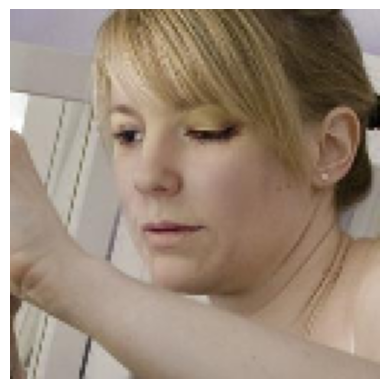

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

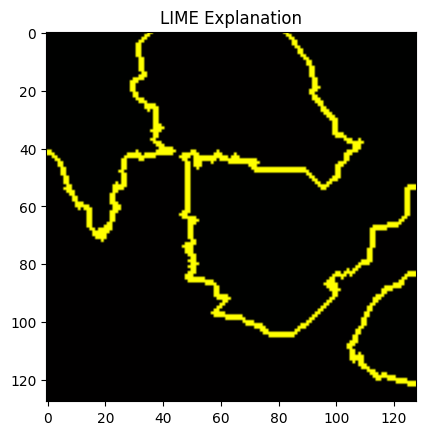

In [104]:
import numpy as np
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt


img = image.load_img(img_path, target_size=(128, 128))  # Resize to fit model input size
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (for CNN input)
img_array /= 255.0  # Normalize pixel values

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Assuming your model is already loaded and img_array is preprocessed
img_array = preprocess_image(img_path)  # Your preprocess function

# Define the LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Explain the model's prediction on the image
explanation = explainer.explain_instance(
    img_array[0],           # Single image (remove batch dimension)
    model.predict,           # Your CNN model's predict function
    top_labels=5,            # Number of top labels to explain
    hide_color=0,            # Pixels to be hidden (black in this case)
    num_samples=1000         # Number of samples for perturbation
)

# Get the explanation for a specific label (e.g., label 0)
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  # The class you are interested in
    positive_only=False,        # Highlight both positive and negative features
    num_features=10,            # Number of superpixels to highlight
    hide_rest=False             # Show other parts of the image
)

# Visualize the result
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation")
plt.show()
